**Required Libraries**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Dataset Loading**

In [72]:
 def load_data(file_path=None):
    """Load the dataset from the given file path or allow the user to input data manually."""
    if file_path:
        try:
            data = pd.read_csv(file_path)
            print("File loaded successfully.")
            return data
        except FileNotFoundError:
            raise FileNotFoundError(f"The file at path '{file_path}' was not found. Please check the file path.")
        except Exception as e:
            raise Exception(f"An error occurred while loading the file: {e}")
    else:
        print("No file path provided. Please input the data manually.")
        columns = input("Enter column names separated by commas: ").split(',')
        print("Now enter the data row by row. Type 'done' when finished.")
        rows = []
        while True:
            row = input("Enter a row of data separated by commas or type 'done': ")
            if row.lower() == 'done':
                break
            rows.append(row.split(','))

        # Create a DataFrame from the manual input
        data = pd.DataFrame(rows, columns=columns)

        # Attempt to convert all columns to numeric where possible
        for col in data.columns:
            try:
                data[col] = pd.to_numeric(data[col], errors='ignore')
            except Exception as e:
                print(f"Could not convert column '{col}' to numeric: {e}")

        print("Data entered successfully.")
        return data

**Data Exploration**

In [73]:
def preview_data(data):
    """Preview the dataset."""
    print("Data preview:")
    print(data.head())
    print("\nData Shape:")
    print(data.shape)
    print("\nData Types:")
    print(data.dtypes)
    print("\nMissing Values:")
    print(data.isnull().sum())

**Grouping**

In [74]:
def group_data(data):
    if 'Date' in data.columns:
     data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
    else:
     raise ValueError("The dataset must contain a 'Date' column.")

    data['YearMonth'] = data['Date'].dt.to_period('M')
    return data

**Data Cleaning**

In [75]:
def clean_data(data):
    """Clean the data by removing rows with missing values."""
    data = data.dropna()
    print("\nData after cleaning:")
    print(data.info())
    return data

**Find Numeric Pollutant Columns**

In [76]:
def find_pollutant_columns(data):
    """Find numeric columns representing pollutants."""
    pollutant_columns = [col for col in data.columns
                         if col not in ['Date', 'YearMonth'] and
                         data[col].dtype in [np.int64, np.float64]]
    print("\nNumeric pollutant columns identified:")
    print(pollutant_columns)
    return pollutant_columns

**Monthly Pollutant Averages**

In [77]:
def calculate_monthly_averages(data, pollutant_columns):
    """Calculate monthly averages for the given pollutant columns."""
    return data.groupby('YearMonth')[pollutant_columns].mean()

**Most Polluted Months**

In [78]:
def identify_most_polluted_months(averages):
    """Identify the most polluted months for each pollutant."""
    return averages.idxmax()

**Line Plots**

In [79]:
def plot_monthly_trends(monthly_averages, pollutant_columns):
    """Plot line charts for monthly pollutant trends."""
    plt.figure(figsize=(12, 8))
    for pollutant in pollutant_columns:
        plt.plot(monthly_averages.index.astype(str), monthly_averages[pollutant], label=pollutant)

    plt.title('Monthly Trends of Pollutants')
    plt.xlabel('Month')
    plt.ylabel('Pollutant Levels')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()


**Scatter Plot**

In [80]:
def plot_pollutant_comparisons(monthly_averages, pollutant_columns):
    """Plot scatter charts to compare pollutant levels."""
    plt.figure(figsize=(10, 6))
    for i, pollutant in enumerate(pollutant_columns[:-1]):
        plt.scatter(monthly_averages[pollutant], monthly_averages[pollutant_columns[i + 1]], label=f"{pollutant} vs {pollutant_columns[i + 1]}")

    plt.title('Pollutant Comparisons')
    plt.xlabel('Pollutant Levels')
    plt.ylabel('Pollutant Levels')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


**Key Insights**

In [81]:
def key_insights(averages, pollutant_columns):
    """Print key insights about the pollutants."""
    print("\nKey Insights:")
    for pollutant in pollutant_columns:
        print(f"- {pollutant}: Highest level recorded in {averages[pollutant].idxmax()} with a mean value of {averages[pollutant].max():.2f}.")


**Main Function**

Enter the file path for the dataset (leave blank to input data manually): /content/AirQualityDataset.csv
File loaded successfully.
Data preview:
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  01-01-2015    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  02-01-2015    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  03-01-2015    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  04-01-2015    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  05-01-2015    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  

Data Shape:
(29531, 16)

Data Types:
City  

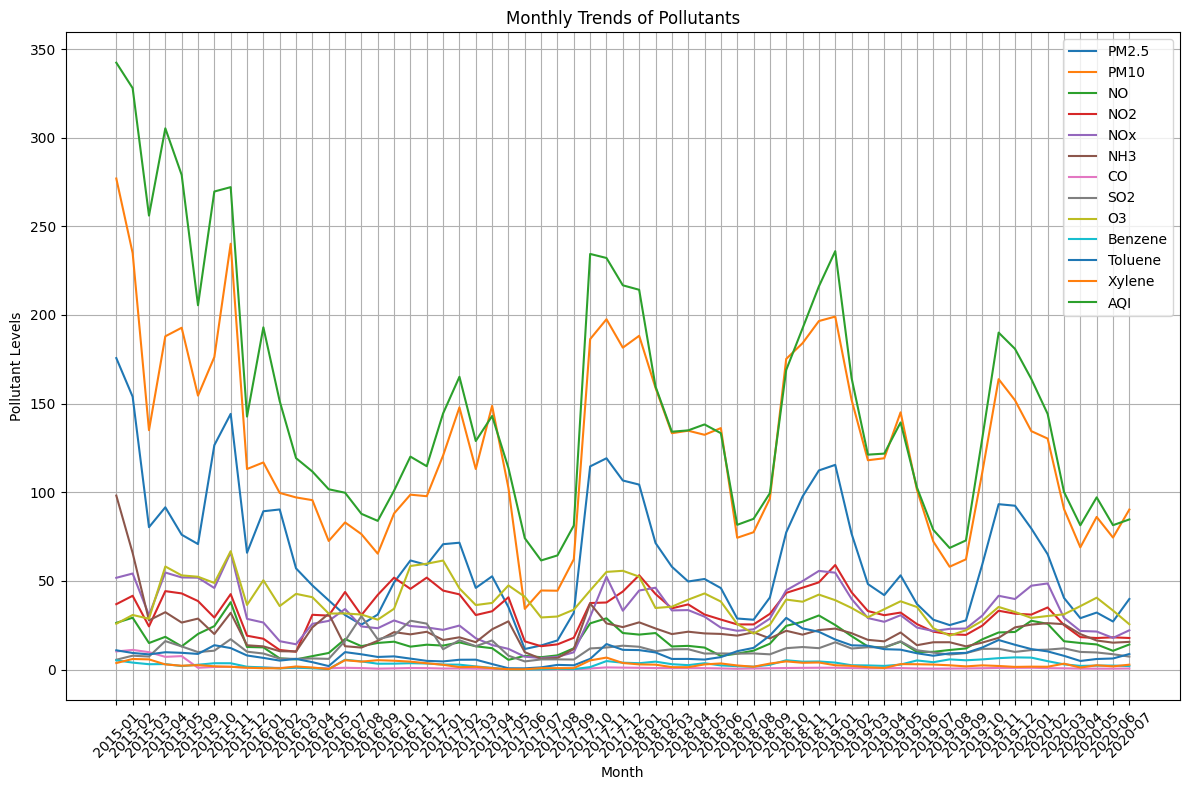

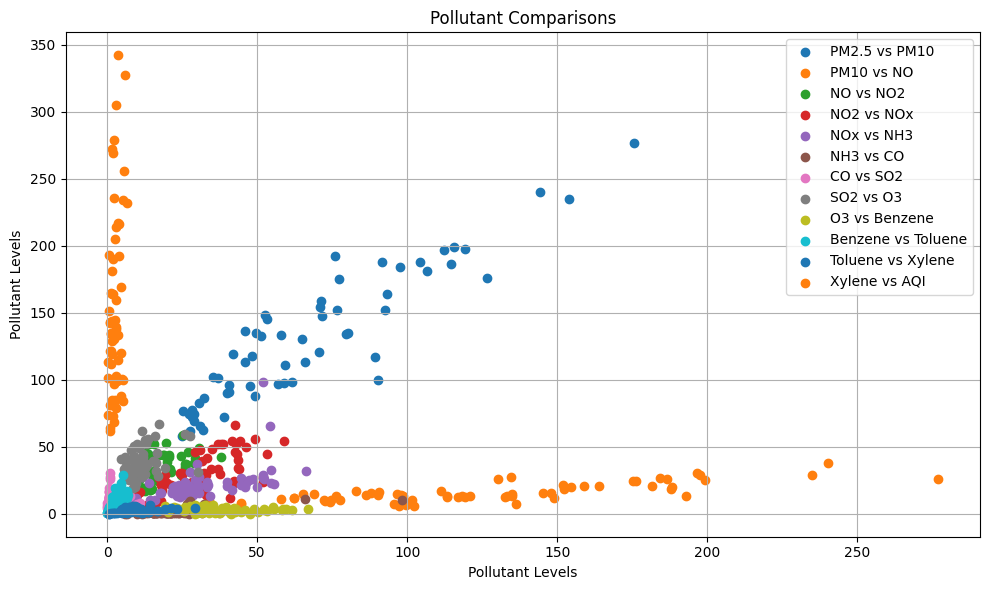


Key Insights:
- PM2.5: Highest level recorded in 2015-01 with a mean value of 175.69.
- PM10: Highest level recorded in 2015-01 with a mean value of 276.97.
- NO: Highest level recorded in 2015-11 with a mean value of 38.04.
- NO2: Highest level recorded in 2019-01 with a mean value of 59.02.
- NOx: Highest level recorded in 2015-11 with a mean value of 66.15.
- NH3: Highest level recorded in 2015-01 with a mean value of 98.16.
- CO: Highest level recorded in 2015-02 with a mean value of 11.14.
- SO2: Highest level recorded in 2016-08 with a mean value of 30.15.
- O3: Highest level recorded in 2015-11 with a mean value of 66.80.
- Benzene: Highest level recorded in 2019-12 with a mean value of 6.92.
- Toluene: Highest level recorded in 2018-10 with a mean value of 29.21.
- Xylene: Highest level recorded in 2017-11 with a mean value of 6.80.
- AQI: Highest level recorded in 2015-01 with a mean value of 342.29.


In [82]:
def main():
    file_path = input("Enter the file path for the dataset (leave blank to input data manually): ")

    # Load data
    data = load_data(file_path if file_path.strip() else None)

    # Preview data
    preview_data(data)

    # Group data
    if 'Date' not in data.columns:
        raise ValueError("The dataset must contain a 'Date' column.")
    data = group_data(data)

    # Find numeric pollutant columns
    pollutant_columns = find_pollutant_columns(data)

    # Clean data
    data = clean_data(data)

    # Calculate monthly averages
    monthly_averages = calculate_monthly_averages(data, pollutant_columns)

    print("\nMonthly pollutant averages:")
    print(monthly_averages)

    # Identify most polluted months
    most_polluted_months = identify_most_polluted_months(monthly_averages)
    print("\nMost polluted months for each pollutant:")
    print(most_polluted_months)

    # Plot data visualizations
    plot_monthly_trends(monthly_averages, pollutant_columns)
    plot_pollutant_comparisons(monthly_averages, pollutant_columns)

    # Key insights
    key_insights(monthly_averages, pollutant_columns)

if __name__ == "__main__":
    main()